# Support Vector Machines (SVMs) - Gonzalo Quintana and Tales Marra

## An elementary SVM

## 1) Manual calculation of the maximal margin classifier

The dividing line $D$ is given by the equation

\begin{equation}
\langle\, \alpha, z \rangle + c = 0
\end{equation}

where $z=(x,y)$ and $\alpha=(a,b)$. The constants $a$, $b$ and $c$ are obtained by solving the following optimization problem:

$min (\| \alpha \|)$

$\langle\, \alpha, z1 \rangle + c \leq -1$

$\langle\, \alpha, z2 \rangle + c \leq 1$

We choose three support vectors (for there are just three unknown values: a, b and c):

- $z1=[1,1]$ for class $-1$

- $z2=[1,5]$ and $z3=[5,1]$ for class $+1$. 

As we have chosen the three most critical support vectors (the three that are the closest to the dividing line) the previous optimization problem reduces to the following.

$\langle\, \alpha, z1 \rangle + c = -1$

$\langle\, \alpha, z2 \rangle + c = 1$

$\langle\, \alpha, z3 \rangle + c = 1$
 
We solve the three corresponding equations : 
- $a + b + c = -1 $
- $a + 5b + c = -1$
- $5a + b + c = 1$

In [4]:
import numpy as np

support_vector = np.array([[1, 1, 1],[1, 5, 1],[5, 1, 1]])
classes = np.array([-1,1,1])
coeff = np.dot(np.linalg.inv(support_vector),np.transpose(classes))
print("The dividing line D is given by: a=", coeff[0],", b=",coeff[1],"and c=",coeff[2])

The dividing line D is given by: a= 0.5 , b= 0.5 and c= -2.0


## 1) Calculation and interpretation of the maximal margin classifier with sklearn

[[1. 1.]
 [1. 5.]
 [5. 1.]]
[1 2]
[0.49975586 0.49975586]


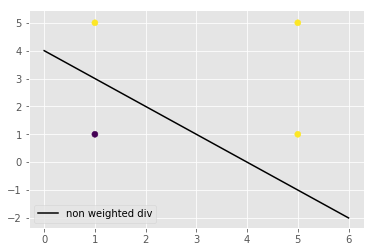

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from sklearn import svm

X = np.array([[1, 1], [1, 5], [5, 1], [5, 5]])
y = [-1,1,1,1]
clf = svm.SVC(kernel='linear')
clf.fit(X, y)
print(clf.support_vectors_)
print(clf.n_support_)
w = clf.coef_[0]
print(w)

a = -w[0] / w[1]
xx = np.linspace(0,6)
yy = a * xx - clf.intercept_[0] / w[1]
plt.plot(xx, yy, 'k-', label="non weighted div")
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.legend()
plt.show()

In [10]:
print("The alpha vector is given by: ", w)
print("The matrix containing the considered support vectors is: ", clf.support_vectors_)
print("The number of support vectors that belong to the first class is")

The alpha vector is given by  [0.49975586 0.49975586]


## Iris

We show, using dimensionality reduction (t-SNE), the data distribution coloured by classes. We can see that data are separable.

In [4]:
from sklearn import svm
from sklearn import datasets
import sklearn
clf = svm.SVC()
iris = datasets.load_iris()
X, y = iris.data, iris.target

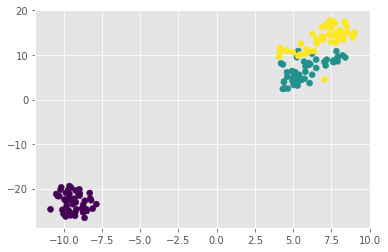

In [5]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
x_trans = tsne.fit_transform(X)
plt.scatter(x_trans[:,0],x_trans[:,1],c=y)
plt.show()

We train the model using cross validation and we show the classification report. We note that the results are really good.

In [6]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)

clf.fit(train_X,train_y)
predict_y = clf.predict(test_X)

In [7]:
from sklearn.metrics import classification_report

class_report= classification_report(test_y, predict_y)
print(class_report)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        19
          1       1.00      1.00      1.00        15
          2       1.00      1.00      1.00        16

avg / total       1.00      1.00      1.00        50



We now split the data and train the model ten times. We show all the results.

In [8]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10, shuffle=True)
i=0
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf.fit(X_train,y_train)
    predict_y = clf.predict(X_test)
    class_report=classification_report(y_test, predict_y)
    print("iteration ", i)
    print(class_report)
    i+=1

iteration  0
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         4
          1       1.00      1.00      1.00         6
          2       1.00      1.00      1.00         5

avg / total       1.00      1.00      1.00        15

iteration  1
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         2
          1       1.00      0.83      0.91         6
          2       0.88      1.00      0.93         7

avg / total       0.94      0.93      0.93        15

iteration  2
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         6
          1       1.00      0.80      0.89         5
          2       0.80      1.00      0.89         4

avg / total       0.95      0.93      0.93        15

iteration  3
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         2
          1       1.00      1.00     

We finally change the kernels used. We note that the performance is really degraded for the Sigmoid kernel.

In [9]:

kernels= ['linear', 'rbf', 'sigmoid']
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)
for k in kernels:
    clf = svm.SVC(kernel=k)
    clf.fit(train_X,train_y)
    predict_y = clf.predict(test_X)
    class_report=classification_report(test_y, predict_y)
    print("Kernel ", k)
    print(class_report)

Kernel  linear
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        19
          1       1.00      1.00      1.00        15
          2       1.00      1.00      1.00        16

avg / total       1.00      1.00      1.00        50

Kernel  rbf
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        19
          1       1.00      1.00      1.00        15
          2       1.00      1.00      1.00        16

avg / total       1.00      1.00      1.00        50

Kernel  sigmoid
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        19
          1       0.30      1.00      0.46        15
          2       0.00      0.00      0.00        16

avg / total       0.09      0.30      0.14        50



/usr/lib/python3/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Chronic kidney disease

We clean the data and we replace missing values by the column's average. We save the prepared data in the file "data.dat", with the input format required by SVM light.

In [81]:
import os, re
f = open("chronic_kidney_disease_full.arff")
file2write = open("data.dat","w")

attribute = dict()
type=dict()
attributes = []
reading_data=0
results=[]
somme = [0] * 25
howmany = [0] * 25
for line in f:
    if (re.match(r'''^@attribute[ ]+'([a-z]+)'[ ]+numeric''',line)):
        m = re.match(r'''^@attribute[ ]+'([a-z]+)'[ ]+numeric''',line)
        name=m.group(1)
        attributes.append(name)
        attribute[name] = dict()
        type[name]='numeric'
    elif (re.match(r'''^@attribute '([a-z]+)' {(.+)}''',line)):
        m=re.match(r'''^@attribute '([a-z]+)' {(.+)}''',line)
        name=m.group(1)
        attributes.append(name)
        values=re.split(',',m.group(2))
        attribute[name] = dict()
        type[name]='modal'
        i=-1
        for x in values:
            i += 1
            attribute[name][x]=i
    elif (reading_data==1):
        vals=re.split(',',line.rstrip())
        if (len(vals)==25):
            results.append(vals)
    elif (re.match(r'''^@data''',line)):
        reading_data=1
for vals in results:
    for i in range(25):
        if (vals[i]!='?'):
            if (type[attributes[i]]=='modal'):
                somme[i] += attribute[attributes[i]][vals[i]]
            else:
                somme[i] += float(vals[i])
            howmany[i] += 1
newresults=[]

for vals in results:
    newvals = [0] * 25
    for i in range(25):
        if (vals[i] == '?'):
            if (howmany[i] > 0):
                newvals[i]=float(somme[i]/howmany[i])
            else:
                newvals[i]=0.0
        elif (type[attributes[i]]=='modal'):
            newvals[i]=float(attribute[attributes[i]][vals[i]])
        else:
            newvals[i]=float(vals[i])
    newresults.append(newvals)
    if (newvals[24]==0):
        result="1"
    else:
        result="-1"
    for i in range(24):
        result += " "+str(i+1)+":"+str(newvals[i])
    result+='\r\n'

    file2write.write(result)

file2write.close()

We generate ten train and test files (each containing a 10 percent of the total data), which will be used by SVM light.

In [82]:
import random, os
f=open("data.dat","r",newline='\r\n')
data=[]
for line in f:
    data.append(line)
    random.shuffle(data)
    dixieme=int(len(data)/10)+1
    for I in range(10):
        train_file = open("train"+str(I)+".dat","w")
        test_file = open("test"+str(I)+".dat","w")
        for J in range(0,I * dixieme):
            if (J < len(data)):
                train_file.write(data[J])
        for J in range(I * dixieme,(I+1) * dixieme):
            if (J < len(data)):
                test_file.write(data[J])
        for J in range((I+1) * dixieme,len(data)):
            if (J < len(data)):
                train_file.write(data[J])
    train_file.close()
    test_file.close()

We execute the SVM and we calculate the average runtime, error, precision and recall.

In [88]:
import subprocess, os, re
from subprocess import PIPE
runtime=0.0
error=0.0
precision=0.0
recall=0.0
for I in range(10):
    p = subprocess.run(['/homes/g18quint/Documents/svm-python-v204/svm_light/svm_learn','-z', 'c', '-c', '1.0', '-t', '1', '-d', '2', 'train'+str(I)+'.dat', 'model'],stdout=subprocess.PIPE)
    for line in re.split(r'\n',p.stdout.decode()):
        if (re.match(r'Runtime in cpu-seconds: ([0-9.]+)',line)):
            m=re.match(r'Runtime in cpu-seconds: ([0-9.]+)',line)
            runtime += float(m.group(1))
        if (re.match(r'XiAlpha-estimate of the error: error<=([0-9.]+)',line)):
            m=re.match(r'XiAlpha-estimate of the error: error<=([0-9.]+)',line)
            error += float(m.group(1))
        if (re.match(r'XiAlpha-estimate of the recall: recall=>([0-9.]+)',line)):
            m=re.match(r'XiAlpha-estimate of the recall: recall=>([0-9.]+)',line)
            recall += float(m.group(1))
        if (re.match(r'XiAlpha-estimate of the precision: precision=>([0-9.]+)',line)):
            m=re.match(r'XiAlpha-estimate of the precision: precision=>([0-9.]+)',line)
            precision += float(m.group(1))
    print(str(I)+"...")
print("runtime = "+str(runtime/10)+" cpu seconds")
print("error = "+str(error/10)+"%")
print("precision = "+str(precision/10)+"%")
print("recall = "+str(recall/10)+"%")

0...
1...
2...
3...
4...
5...
6...
7...
8...
9...
runtime = 14.669 cpu seconds
error = 23.485999999999997%
precision = 79.98100000000001%
recall = 85.09700000000001%
